<a href="https://colab.research.google.com/github/prisha1505/Recommendation-System-using-ML/blob/main/youtube_channel_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/Global YouTube Statistics.csv",encoding="latin-1")

In [3]:
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [5]:
df.shape

(995, 28)

In [6]:
df.isnull().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

In [7]:
df = df.rename(columns={'Country': 'country'})

In [8]:
df['subscribers'].max()

245000000

In [9]:
df['subscribers'].min()

12300000

# Distribution of youtubers by channel type

In [10]:
df['channel_type'].value_counts()

channel_type
Entertainment    304
Music            216
People           101
Games             98
Comedy            51
Education         49
Film              42
Howto             36
News              30
Tech              17
Sports            13
Autos              3
Animals            3
Nonprofit          2
Name: count, dtype: int64

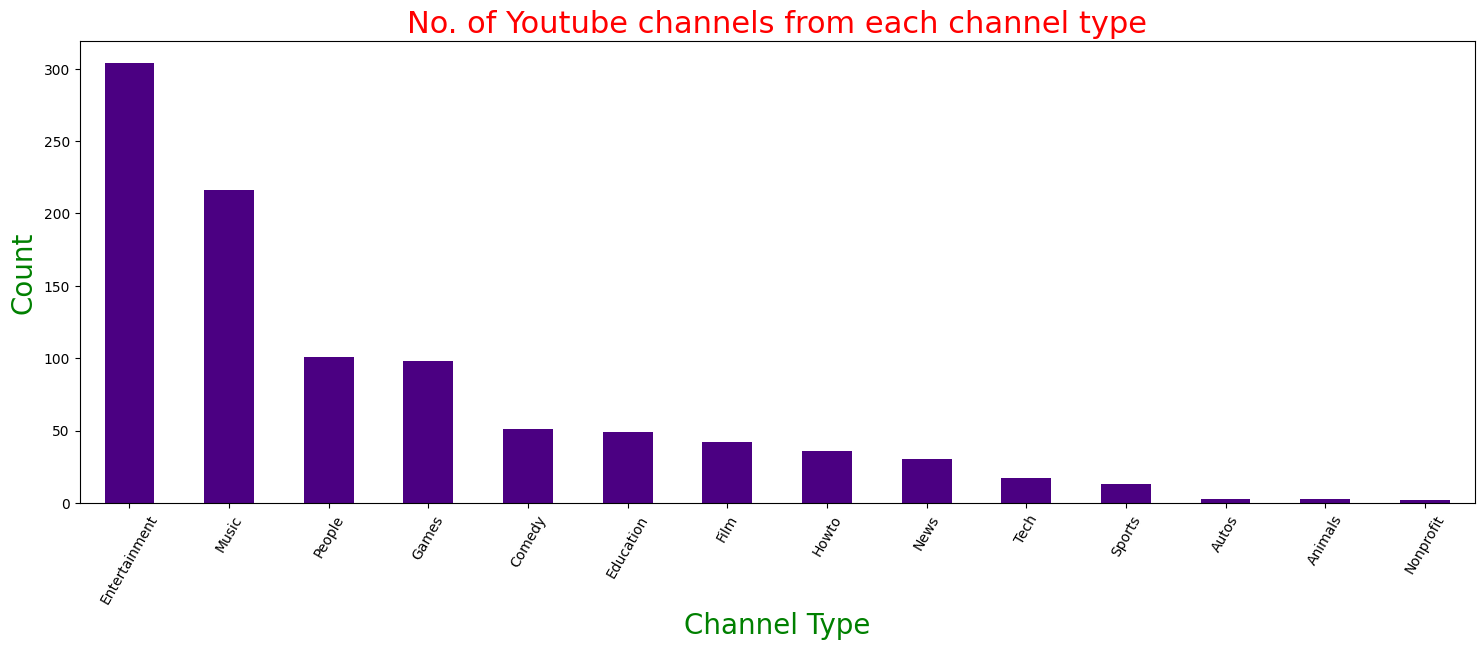

In [11]:
youtubers_distribution_by_channel_type = df['channel_type'].value_counts()
fig, ax = plt.subplots(figsize=(18, 6))
youtubers_distribution_by_channel_type.plot(kind='bar', color='indigo')
plt.ylabel('Count', color='green',size=20)
plt.xlabel('Channel Type', color='green',size=20)
plt.title('No. of Youtube channels from each channel type', color='red',size=22)

plt.xticks(rotation=60) #Rotate the country names for better readability
                        # Note:- if you won't provide rotation then it automatically takes 90 degree

plt.show()

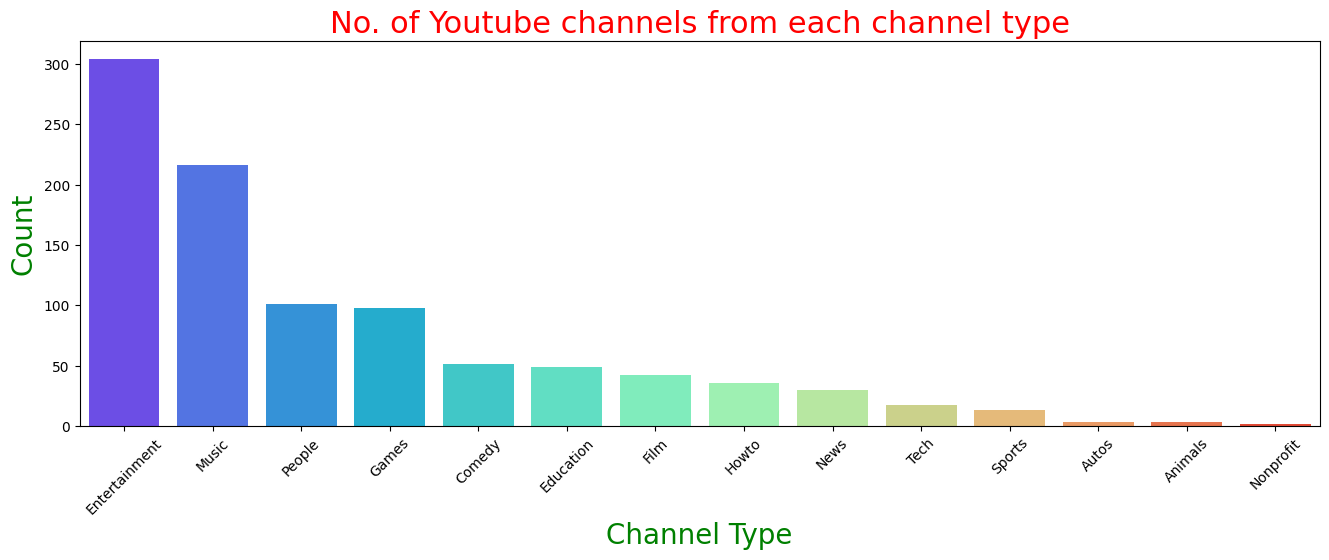

In [12]:
# Create a bar plot using Seaborn
plt.figure(figsize=(16, 5))
sns.barplot(x=youtubers_distribution_by_channel_type.index, y=youtubers_distribution_by_channel_type.values, palette='rainbow')
plt.ylabel('Count', color='green', size=20)
plt.xlabel('Channel Type', color='green', size=20)
plt.title('No. of Youtube channels from each channel type', color='red', size=22)
plt.xticks(rotation=45)  # Rotate the channel types for better readability

plt.show()

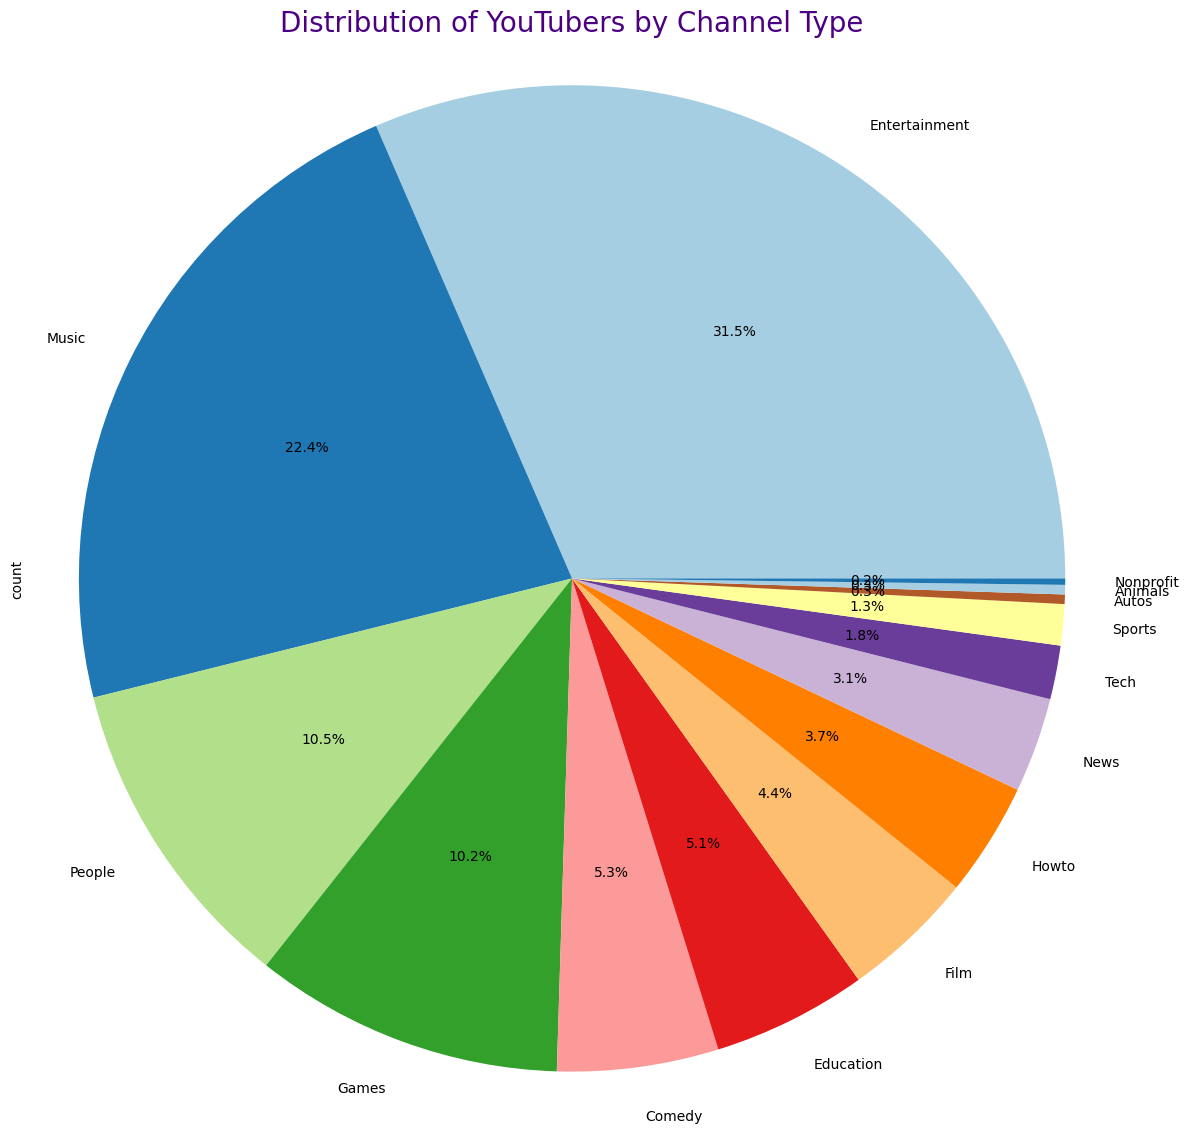

In [13]:
youtubers_distribution_by_channel_type = df['channel_type'].value_counts()
plt.figure(figsize=(14,14))
youtubers_distribution_by_channel_type.plot(kind='pie', autopct='%1.1f%%', startangle=360, colors=plt.cm.Paired.colors)

# Create a pie chart
plt.title('Distribution of YouTubers by Channel Type',color='indigo',size=20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

# Top 10 YouTubers by subscribers

In [14]:
# Sort the DataFrame by the 'subscribers' column in descending order and select the top 10
top_10_youtubers_by_subscribers = df[['Youtuber', 'subscribers']].sort_values(by='subscribers', ascending=False).head(10)

# Display the top 10 YouTubers with only 'youtuber' and 'subscribers' columns
top_10_youtubers_by_subscribers

,Youtuber,subscribers
0,T-Series,245000000
1,YouTube Movies,170000000
2,MrBeast,166000000
3,Cocomelon - Nursery Rhymes,162000000
4,SET India,159000000
5,Music,119000000
6,ýýý Kids Diana Show,112000000
7,PewDiePie,111000000
8,Like Nastya,106000000
9,Vlad and Niki,98900000


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['subscribers'].plot(kind='hist', bins=20, title='subscribers')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='index', y='subscribers', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['subscribers']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('subscribers')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['subscribers'].plot(kind='line', figsize=(8, 4), title='subscribers')
plt.gca().spines[['top', 'right']].set_visible(False)

# Top 10 YouTubers by subscribers using bar graph(matplotlib)

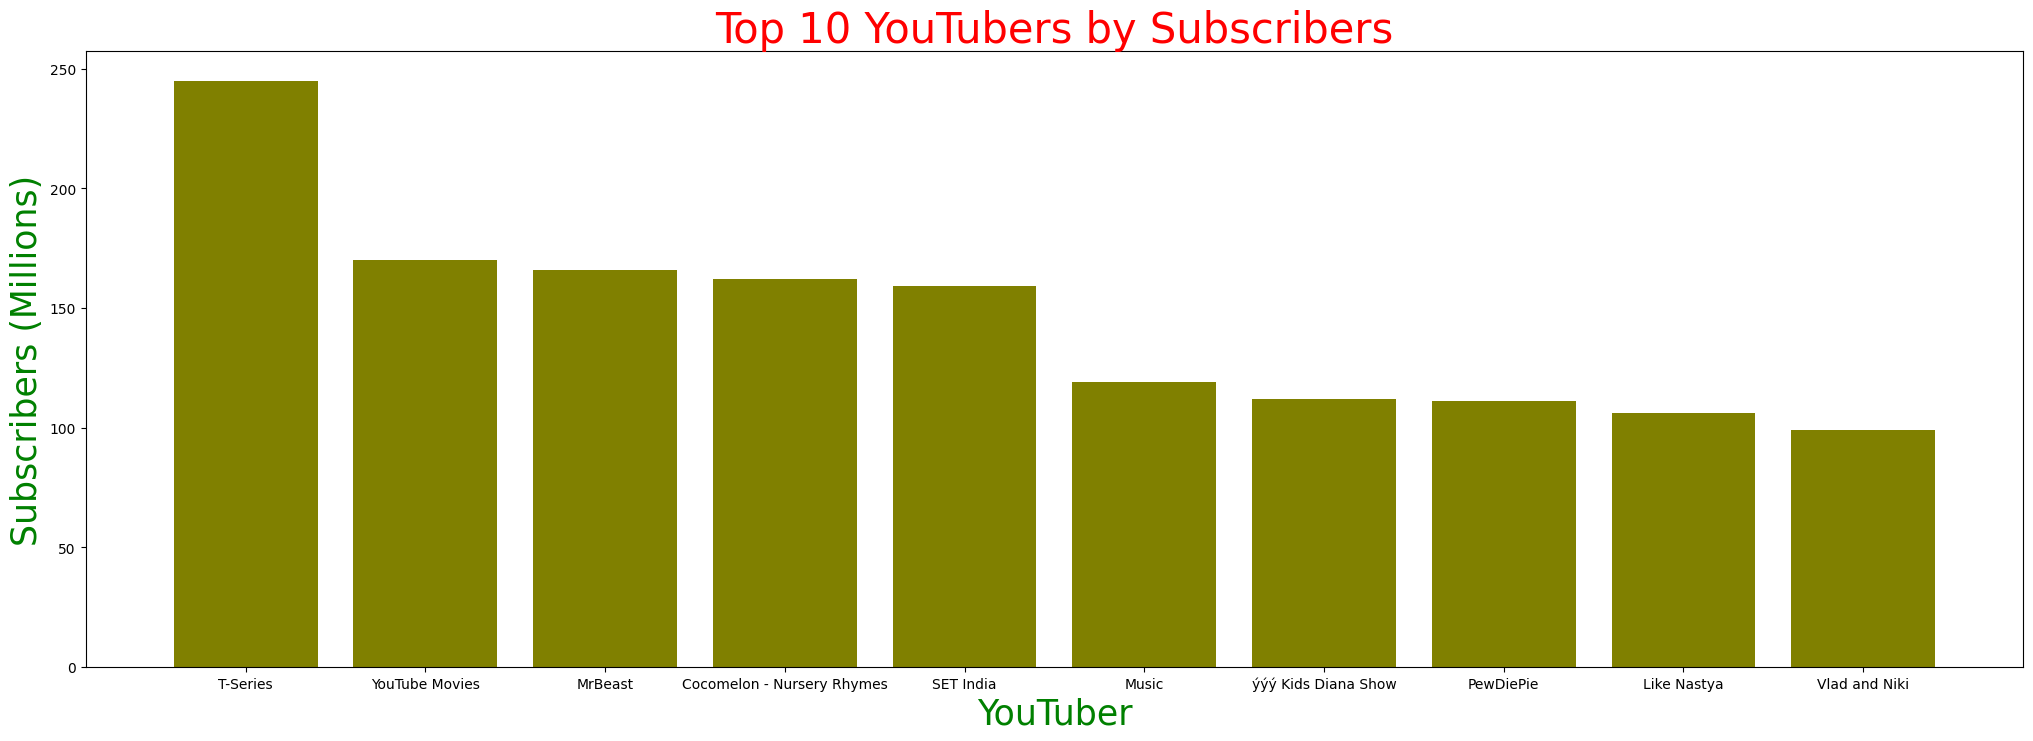

In [15]:
# Convert subscribers to millions
top_10_youtubers_by_subscribers['subscribers'] = top_10_youtubers_by_subscribers['subscribers']/1000000  # Divide by 1,000,000
# Create a bar graph
plt.figure(figsize=(25, 8))
plt.bar(top_10_youtubers_by_subscribers['Youtuber'], top_10_youtubers_by_subscribers['subscribers'], color='olive')
plt.xlabel('YouTuber', color='green',size=25)
plt.ylabel('Subscribers (Millions)', color='green',size=25)
#ax.set_yticklabels([f'{int(label/1e6)}M' for label in ax.get_yticks()])
plt.title('Top 10 YouTubers by Subscribers', color='red',size=30)
#plt.gca().invert_yaxis()  # Invert the y-axis to show the highest subscribers at the top
plt.show()

# Top 10 YouTubers by subscribers using barplot (*seaborn)

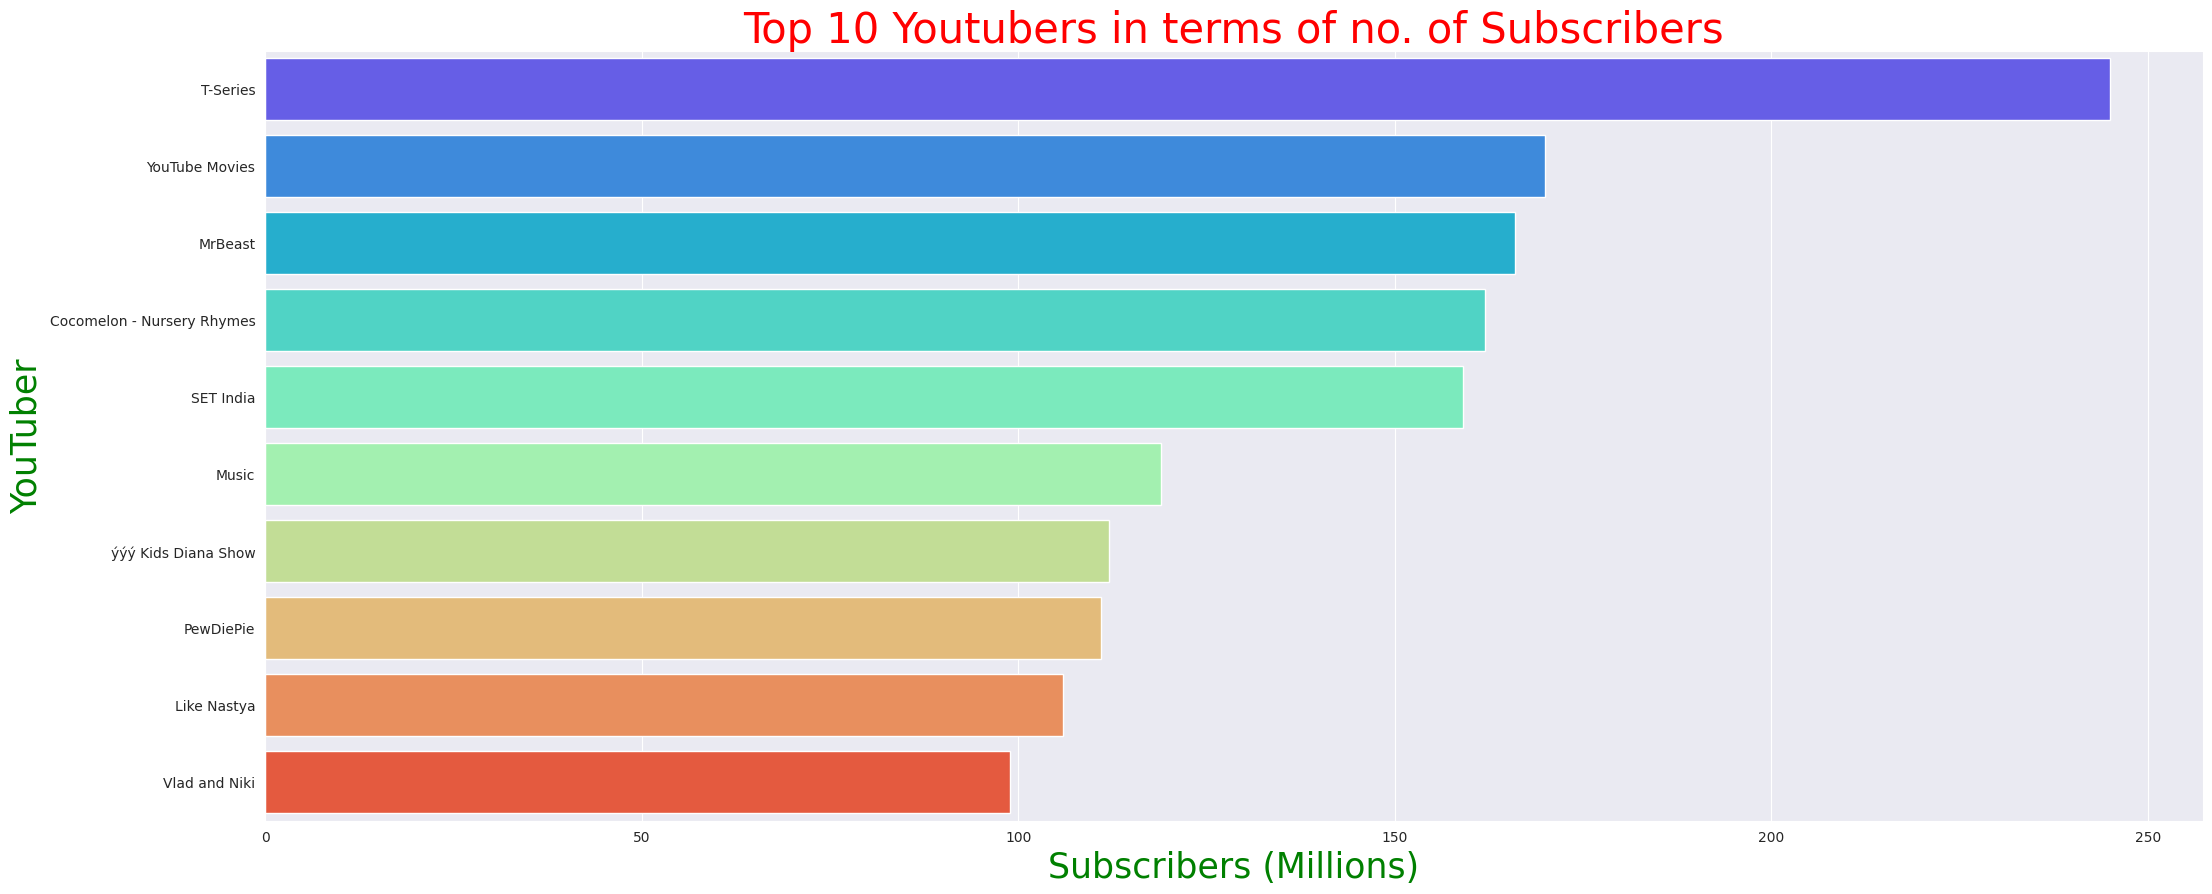

In [16]:
# Convert subscribers to millions
#top_10_youtubers['subscribers'] = top_10_youtubers['subscribers']   # Divide by 1,000,000

# Create a bar graph
sns.set_style('darkgrid')
plt.figure(figsize=(25,10))
sns.barplot(x='subscribers', y='Youtuber', data=top_10_youtubers_by_subscribers, palette='rainbow')
plt.xlabel('Subscribers (Millions)', color='green', size=25)
plt.ylabel('YouTuber', color='green', size=25)
ax.set_yticklabels([f'{int(label/1e6)}M' for label in ax.get_yticks()])
plt.title('Top 10 Youtubers in terms of no. of Subscribers', color='red',size=30)
#plt.gca().invert_yaxis()  # Invert the y-axis to show the highest subscribers at the top
plt.show()

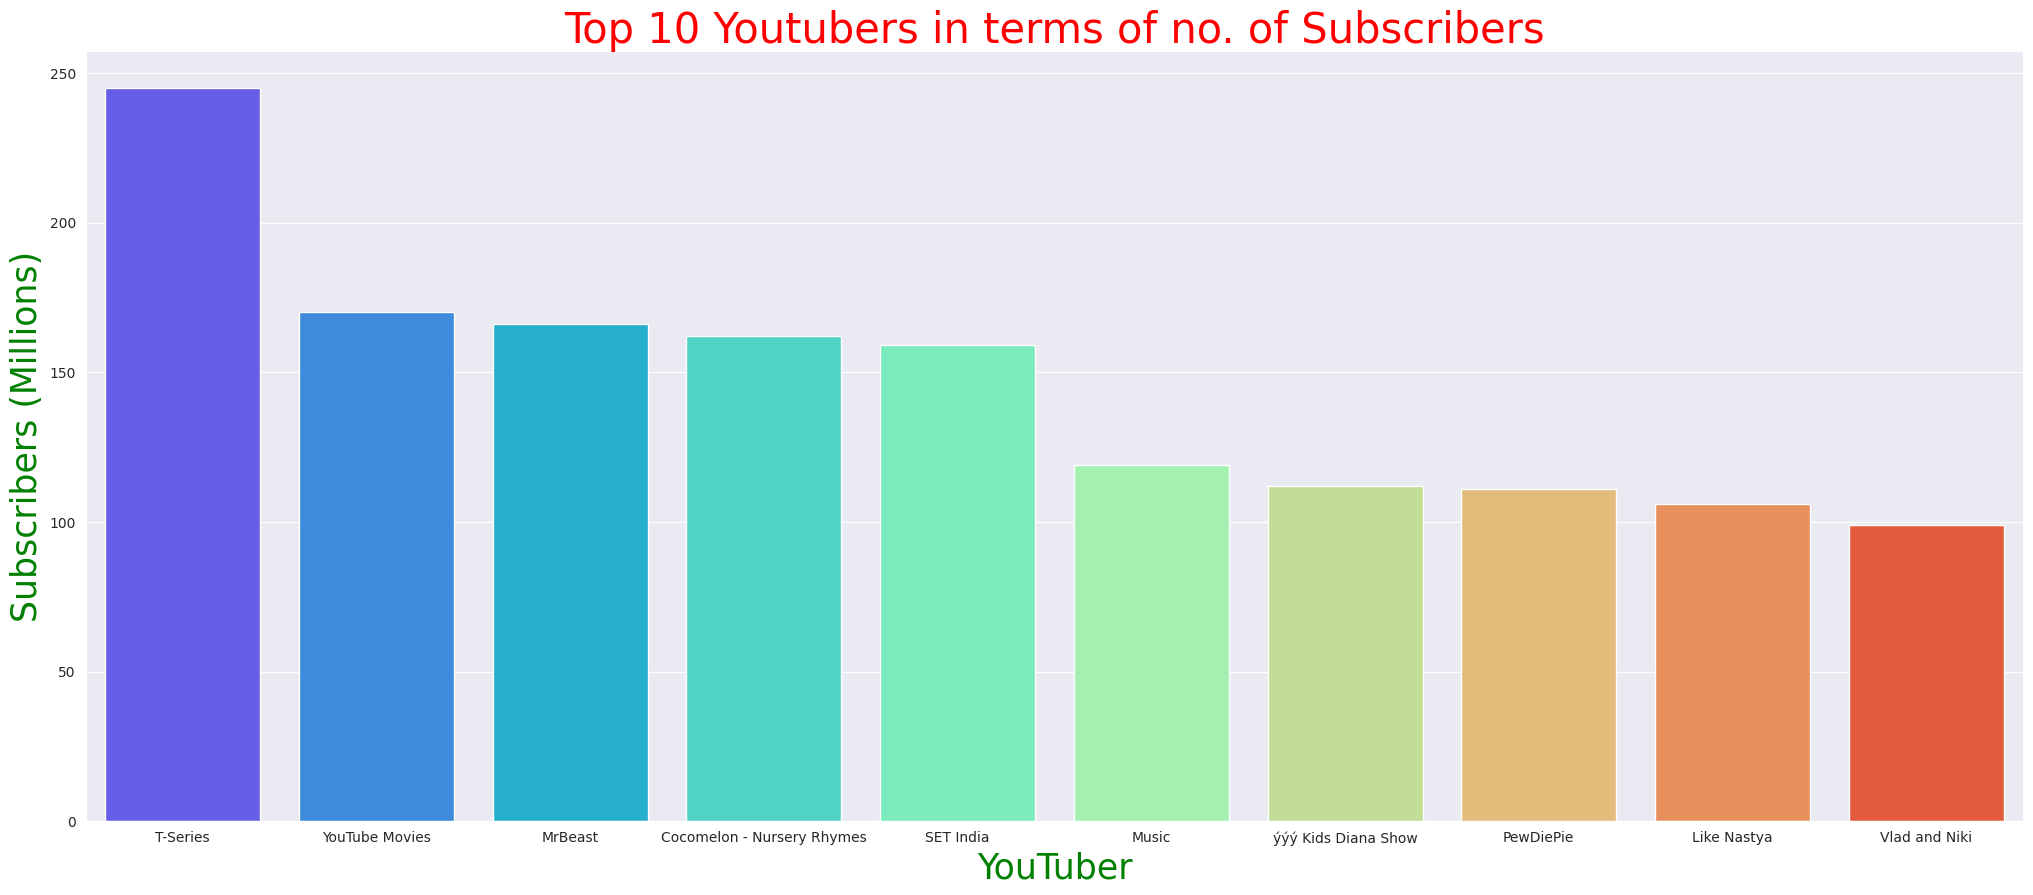

In [17]:
# Convert subscribers to millions
#top_10_youtubers['subscribers'] = top_10_youtubers['subscribers']   # Divide by 1,000,000

# Create a bar graph
sns.set_style('darkgrid')
plt.figure(figsize=(25,10))
sns.barplot(y='subscribers', x='Youtuber', data=top_10_youtubers_by_subscribers, palette='rainbow')
plt.xlabel('YouTuber', color='green', size=25)
plt.ylabel('Subscribers (Millions)', color='green', size=25)
ax.set_yticklabels([f'{int(label/1e6)}M' for label in ax.get_yticks()])
plt.title('Top 10 Youtubers in terms of no. of Subscribers', color='red',size=30)
#plt.gca().invert_yaxis()  # Invert the y-axis to show the highest subscribers at the top
plt.show()

# Top 10 youtubers by uploads

In [18]:
# Sort the DataFrame by the 'subscribers' column in descending order and select the top 10
top_10_youtubers_by_uploads = df[['Youtuber', 'uploads']].sort_values(by='uploads', ascending=False).head(10)

# Display the top 10 YouTubers with only 'youtuber' and 'subscribers' columns
top_10_youtubers_by_uploads

,Youtuber,uploads
95,ABP NEWS,301308
857,GMA Integrated News,296272
747,TV9 Bharatvarsh,293516
33,Aaj Tak,283775
107,IndiaTV,273255
689,KOMPASTV,269050
586,Thairath Online,244899
502,News 24,211620
673,ABS-CBN News,209520
84,TEDx Talks,200933


from matplotlib import pyplot as plt
top_10_youtubers_by_uploads['uploads'].plot(kind='hist', bins=20, title='uploads')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_10_youtubers_by_uploads['uploads'].plot(kind='line', figsize=(8, 4), title='uploads')
plt.gca().spines[['top', 'right']].set_visible(False)

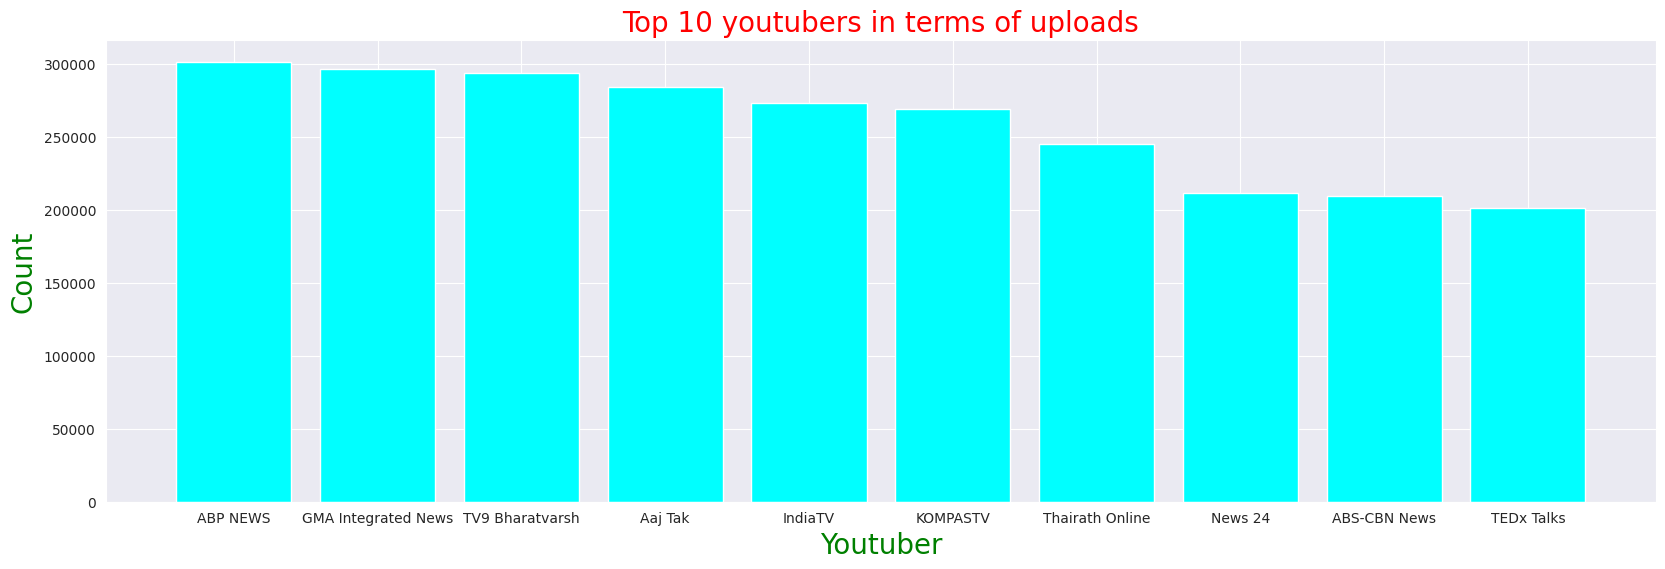

In [19]:
plt.figure(figsize=(20,6))
plt.bar(top_10_youtubers_by_uploads['Youtuber'], top_10_youtubers_by_uploads['uploads'], color='cyan')
plt.xlabel('Youtuber', color='green', size=20)
plt.ylabel('Count', color='green', size=20)
plt.title('Top 10 youtubers in terms of uploads', color='red', size=20)
plt.show()

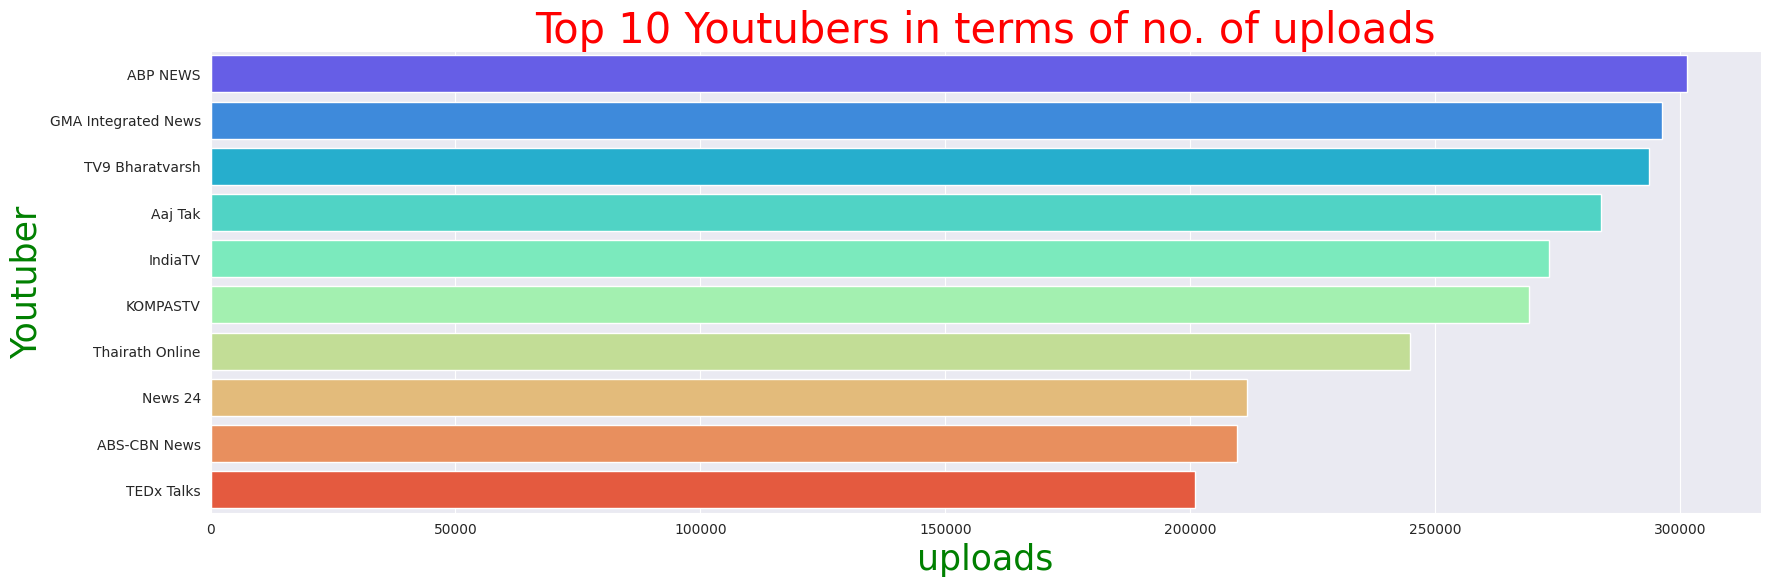

In [20]:
# Create a bar graph
sns.set_style('darkgrid')
plt.figure(figsize=(20,6))
sns.barplot(y='Youtuber', x='uploads', data=top_10_youtubers_by_uploads, palette='rainbow')
plt.xlabel('uploads', color='green', size=25)
plt.ylabel('Youtuber', color='green', size=25)
plt.title('Top 10 Youtubers in terms of no. of uploads', color='red',size=30)
#plt.gca().invert_yaxis()  # Invert the y-axis to show the highest subscribers at the top
plt.show()

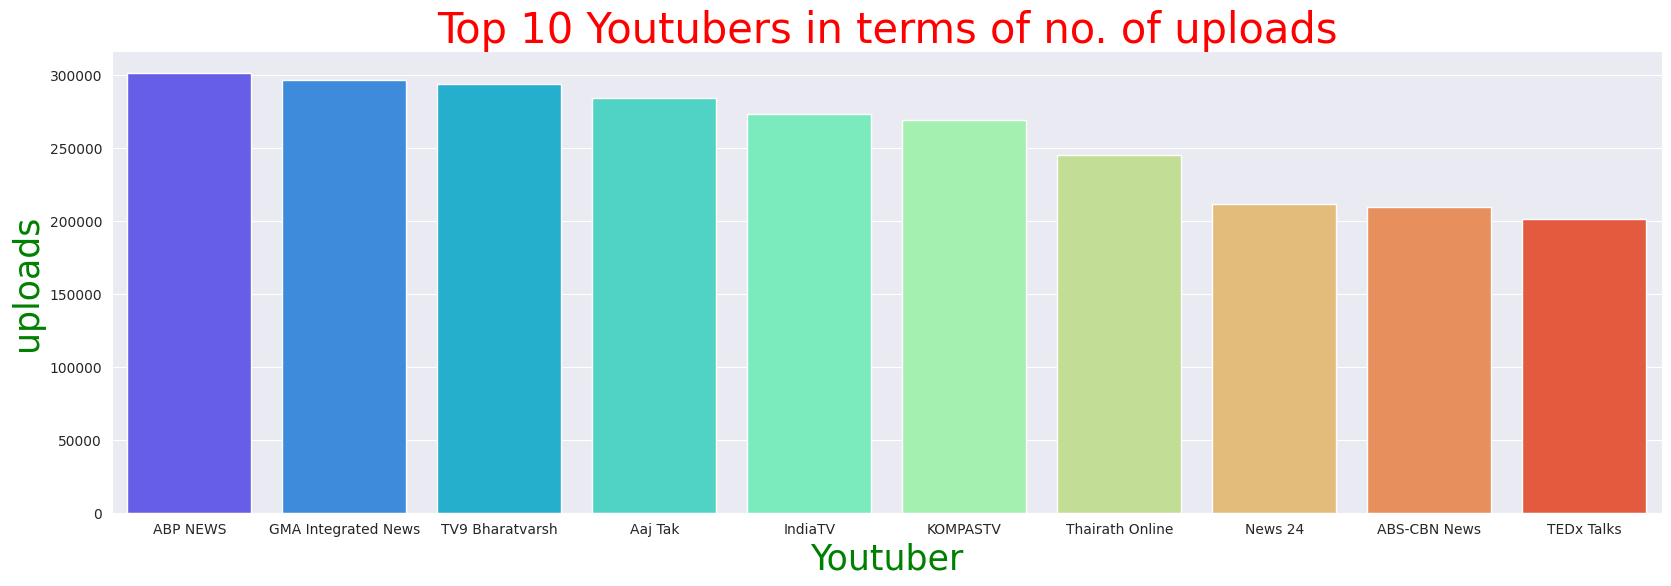

In [21]:
# Create a bar graph
sns.set_style('darkgrid')
plt.figure(figsize=(20,6))
sns.barplot(x='Youtuber', y='uploads', data=top_10_youtubers_by_uploads, palette='rainbow')
plt.ylabel('uploads', color='green', size=25)
plt.xlabel('Youtuber', color='green', size=25)
plt.title('Top 10 Youtubers in terms of no. of uploads', color='red',size=30)
#plt.gca().invert_yaxis()  # Invert the y-axis to show the highest subscribers at the top
plt.show()

# Top 10 YouTubers by video views

In [22]:
# Sort the DataFrame by the 'subscribers' column in descending order and select the top 10
top_10_youtubers_by_views = df[['Youtuber', 'video views']].sort_values(by='video views', ascending=False).head(10)

# Display the top 10 YouTubers with only 'youtuber' and 'subscribers' columns
top_10_youtubers_by_views

,Youtuber,video views
0,T-Series,2.280000e+11
3,Cocomelon - Nursery Rhymes,1.640000e+11
4,SET India,1.480000e+11
15,Sony SAB,1.010000e+11
6,ýýý Kids Diana Show,9.324704e+10
8,Like Nastya,9.047906e+10
11,WWE,7.742847e+10
9,Vlad and Niki,7.718017e+10
21,Zee TV,7.313905e+10
26,Colors TV,6.151091e+10


# Top 10 YouTubers by video views using bar graph

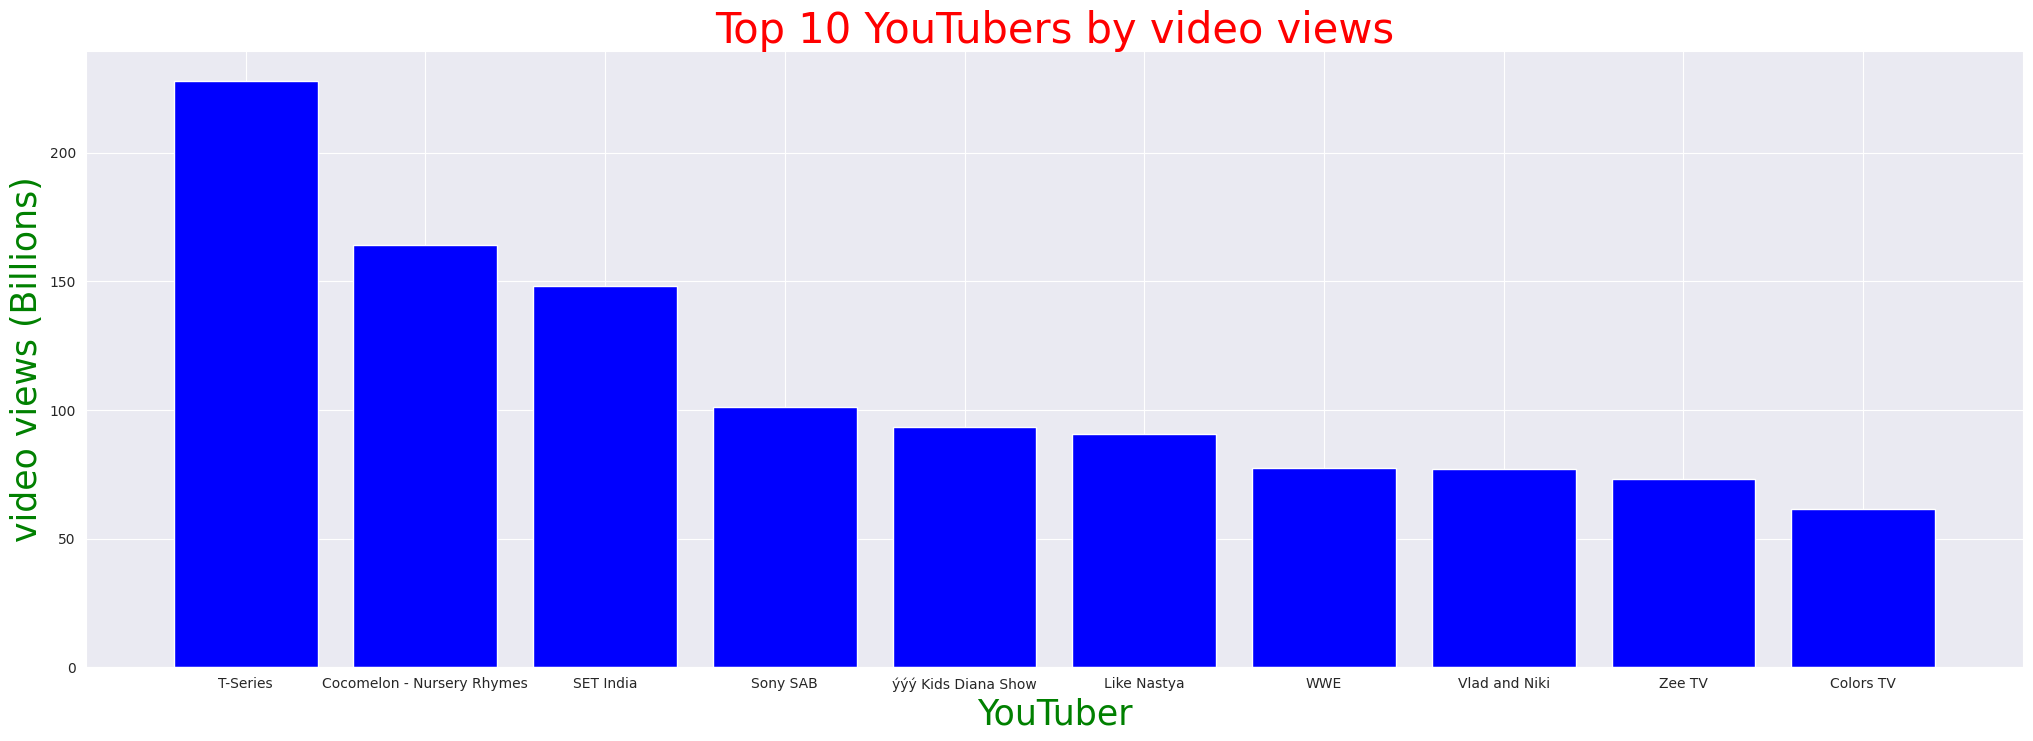

In [23]:
# Convert subscribers to millions
top_10_youtubers_by_views['video views'] = top_10_youtubers_by_views['video views']/1000000000  # Divide by 1,000,000
# Create a bar graph
plt.figure(figsize=(25, 8))
plt.bar(top_10_youtubers_by_views['Youtuber'], top_10_youtubers_by_views['video views'], color='blue')
plt.xlabel('YouTuber', color='green',size=25)
plt.ylabel('video views (Billions)', color='green',size=25)
#ax.set_yticklabels([f'{int(label/1e6)}M' for label in ax.get_yticks()])
plt.title('Top 10 YouTubers by video views', color='red',size=30)
#plt.gca().invert_yaxis()  # Invert the y-axis to show the highest subscribers at the top
plt.show()

# Top 10 YouTubers by video views using barplot

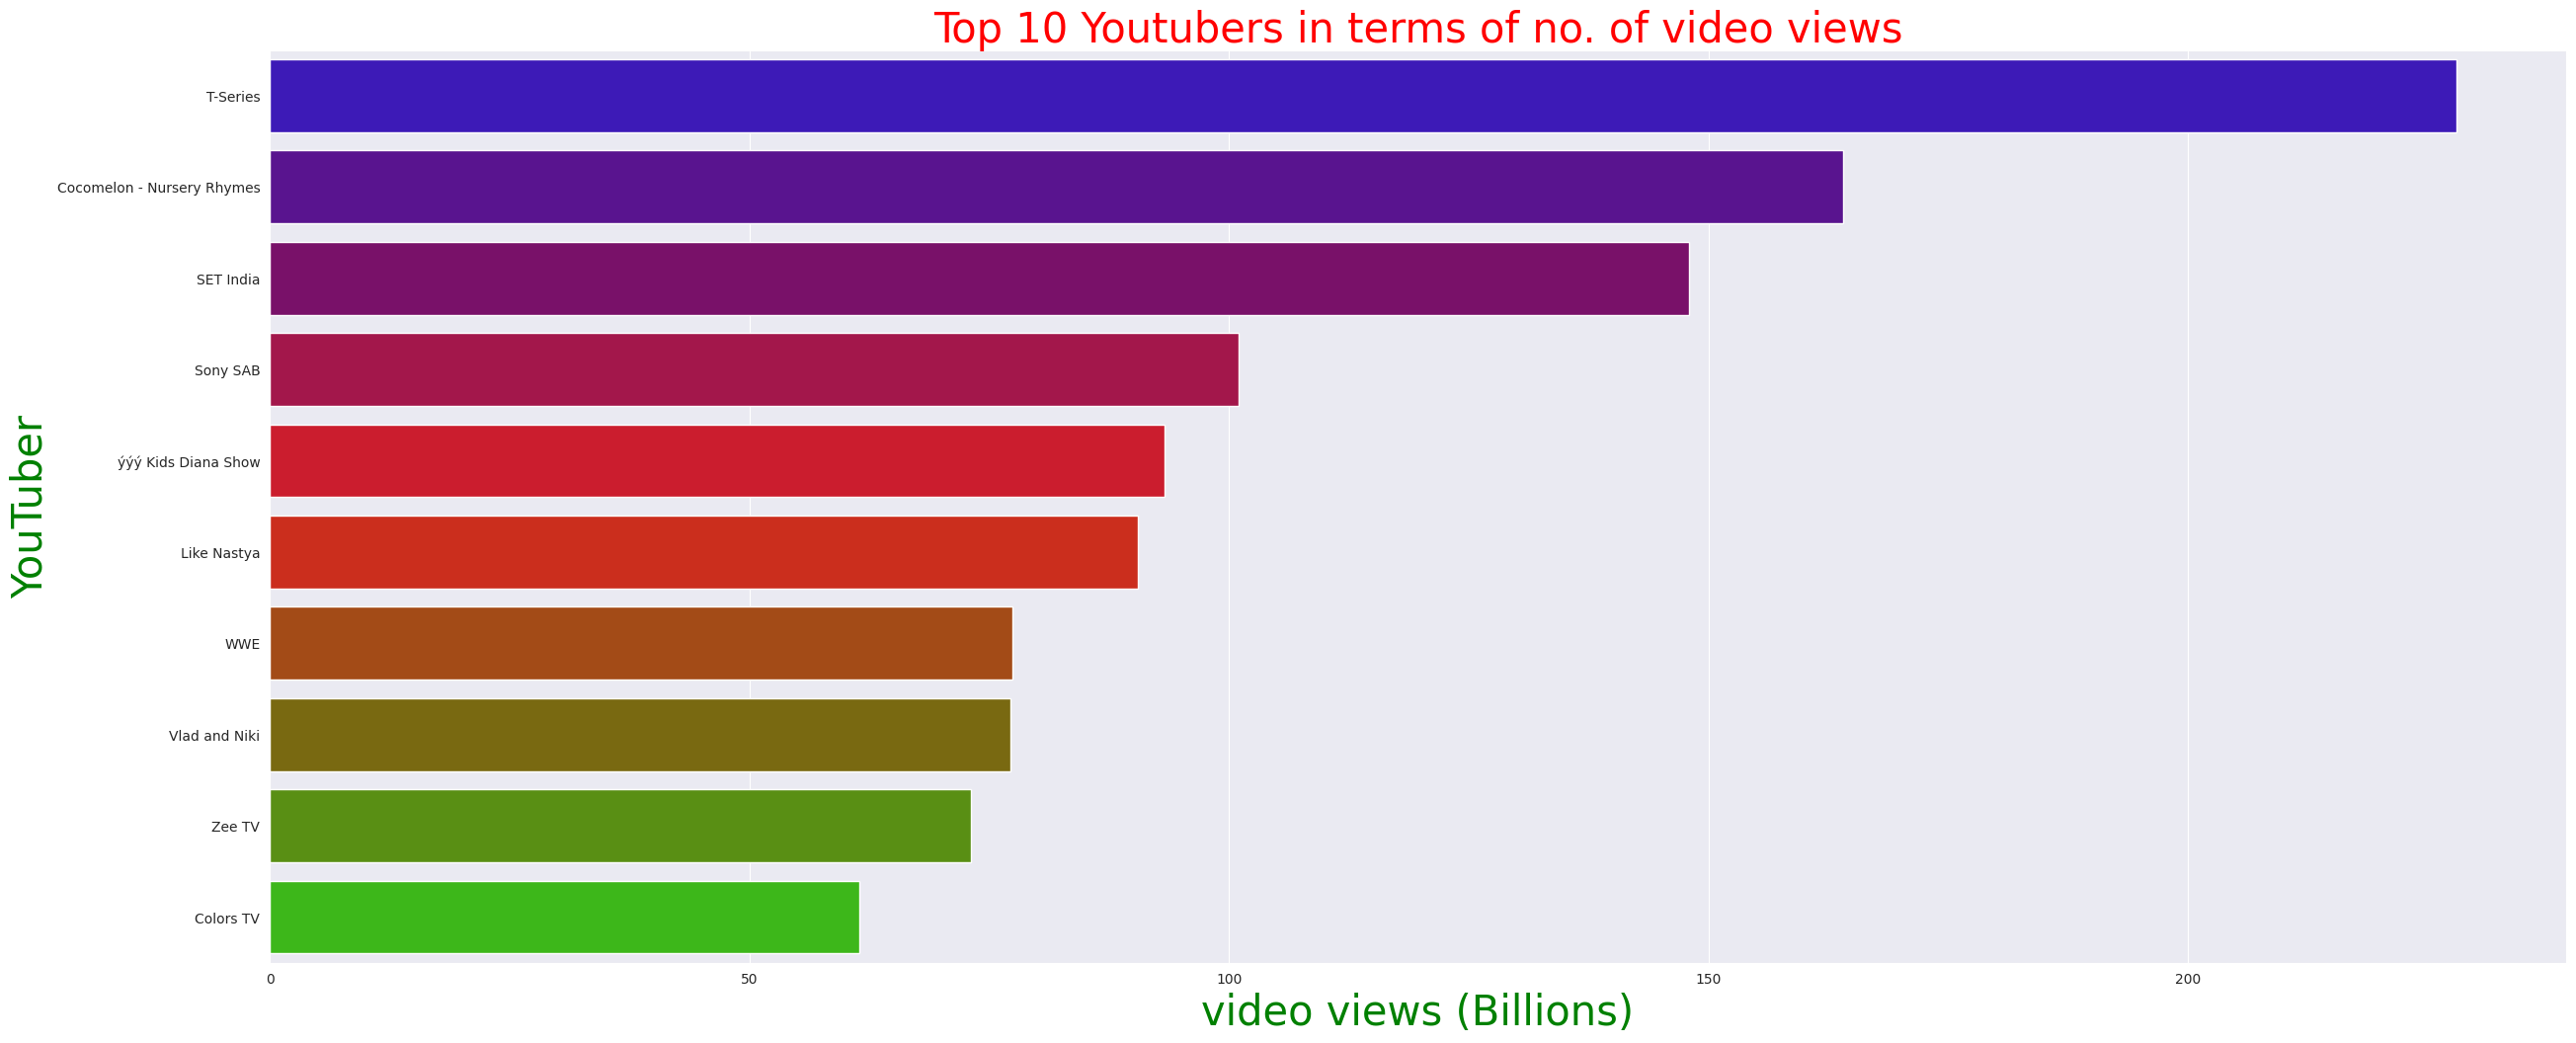

In [24]:
# Convert subscribers to millions
#top_10_youtubers['subscribers'] = top_10_youtubers['subscribers']   # Divide by 1,000,000,000

# Create a bar graph
sns.set_style('darkgrid')
plt.figure(figsize=(30,12))
sns.barplot(x='video views', y='Youtuber', data=top_10_youtubers_by_views, palette='brg')
plt.xlabel('video views (Billions)', color='green', size=30)
plt.ylabel('YouTuber', color='green', size=30)
ax.set_yticklabels([f'{int(label/1e9)}B' for label in ax.get_yticks()])
plt.title('Top 10 Youtubers in terms of no. of video views', color='red',size=30)
#plt.gca().invert_yaxis()  # Invert the y-axis to show the highest subscribers at the top
plt.show()

In [25]:
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


# Distribution of youtubers in each country

In [26]:
df['country'].value_counts()

country
United States           313
India                   168
Brazil                   62
United Kingdom           43
Mexico                   33
Indonesia                28
Spain                    22
Thailand                 18
South Korea              17
Russia                   16
Canada                   15
Argentina                13
Philippines              12
Colombia                 11
Australia                 9
Saudi Arabia              9
Ukraine                   8
United Arab Emirates      7
Germany                   6
Pakistan                  6
France                    5
Japan                     5
Turkey                    4
Sweden                    4
Vietnam                   3
Jordan                    3
Netherlands               3
Singapore                 3
Chile                     3
Egypt                     2
Ecuador                   2
Iraq                      2
Italy                     2
China                     1
Peru                      1
Andorra     

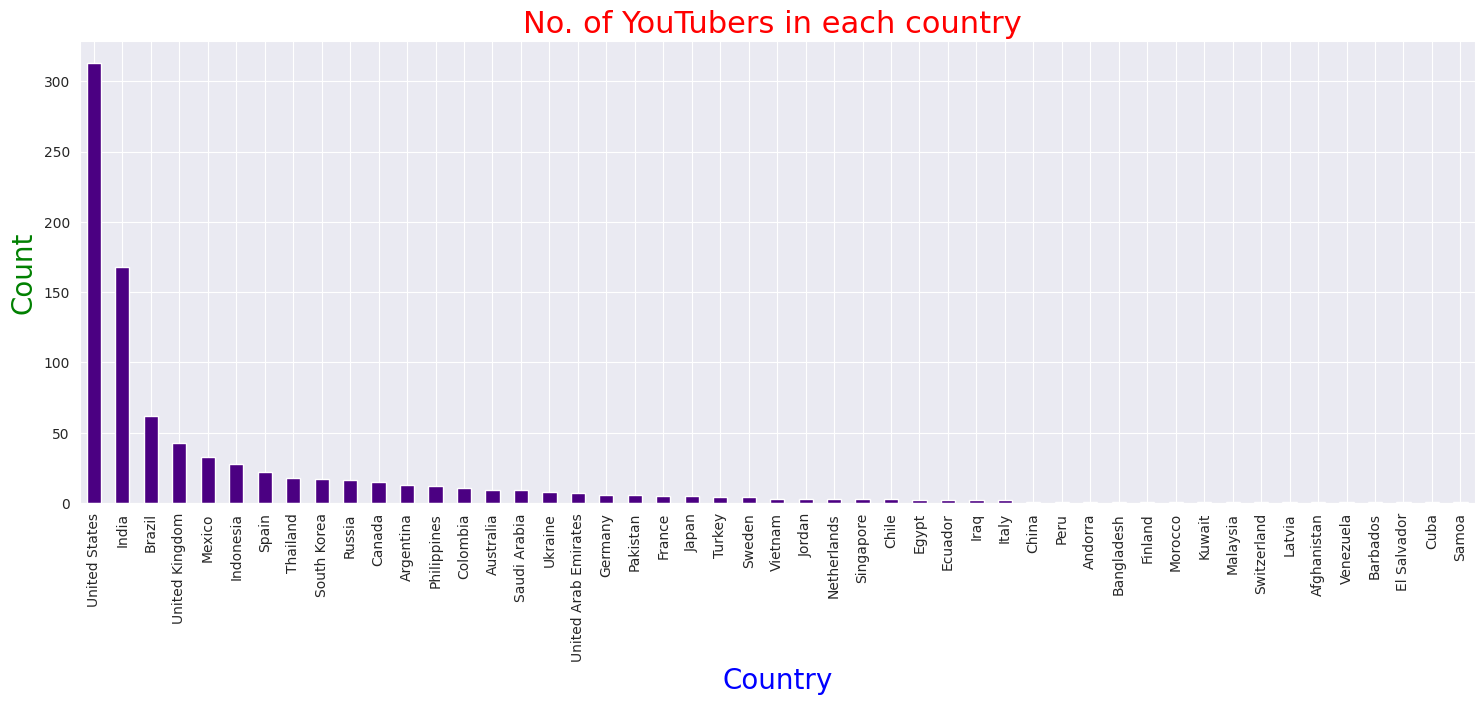

In [27]:
youtubers_distribution_by_country = df['country'].value_counts()
# Create a bar graph
fig, ax = plt.subplots(figsize=(18,6))
youtubers_distribution_by_country.plot(kind='bar', color='indigo')
plt.ylabel('Count', color='green',size=20)
plt.xlabel('Country', color='blue',size=20)
plt.title('No. of YouTubers in each country ', color='red',size=22)

plt.xticks(rotation=90) #Rotate the country names for better readability
                        # Note:- if you won't provide rotation then it automatically takes 90 degree
plt.show()

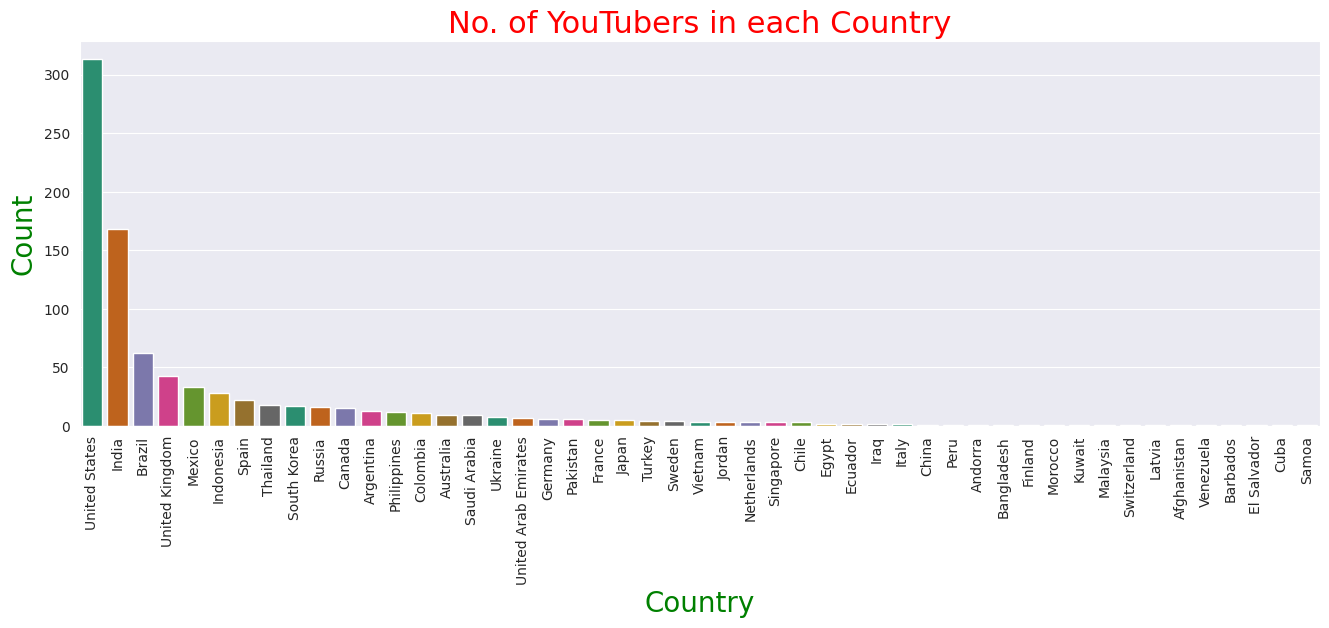

In [28]:
# Create a bar plot using Seaborn
plt.figure(figsize=(16, 5))
sns.barplot(x=youtubers_distribution_by_country.index, y=youtubers_distribution_by_country.values, palette='Dark2')
plt.ylabel('Count', color='green', size=20)
plt.xlabel('Country', color='green', size=20)
plt.title('No. of YouTubers in each Country', color='red', size=22)
plt.xticks(rotation=90)  # Rotate the channel types for better readability

plt.show()

# Distribution of YouTubers by Category

In [29]:
# count the no of youtubers in each category
df['category'].value_counts()

category
Entertainment            241
Music                    202
People & Blogs           132
Gaming                    94
Comedy                    69
Film & Animation          46
Education                 45
Howto & Style             40
News & Politics           26
Science & Technology      17
Shows                     13
Sports                    11
Pets & Animals             4
Trailers                   2
Nonprofits & Activism      2
Movies                     2
Autos & Vehicles           2
Travel & Events            1
Name: count, dtype: int64

# Distribution of YouTubers by Category using bar graph

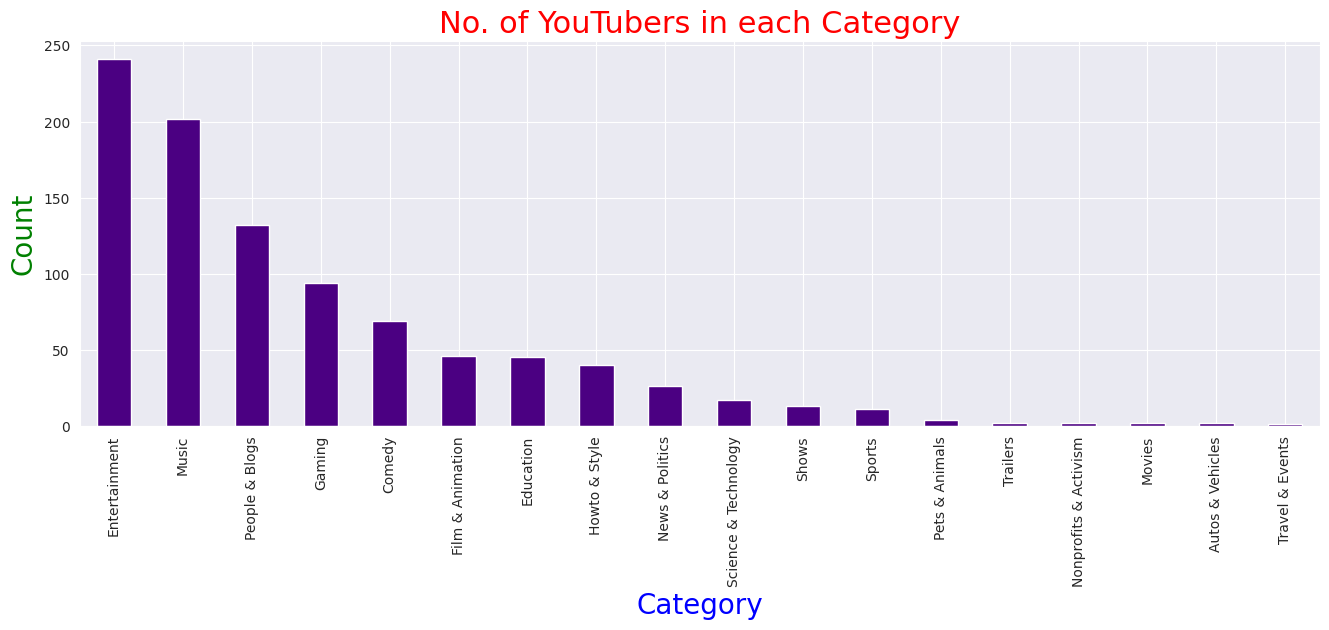

In [30]:
youtubers_distribution_by_category = df['category'].value_counts()
fig, ax = plt.subplots(figsize=(16, 5))
youtubers_distribution_by_category.plot(kind='bar', color='indigo')
plt.ylabel('Count', color='green',size=20)
plt.xlabel('Category', color='blue',size=20)
plt.title('No. of YouTubers in each Category', color='red',size=22)

plt.xticks(rotation=90) #Rotate the country names for better readability
                        # Note:- if you won't provide rotation then it automatically takes 90 degree

plt.show()

# Distribution of YouTubers by Category using barplot

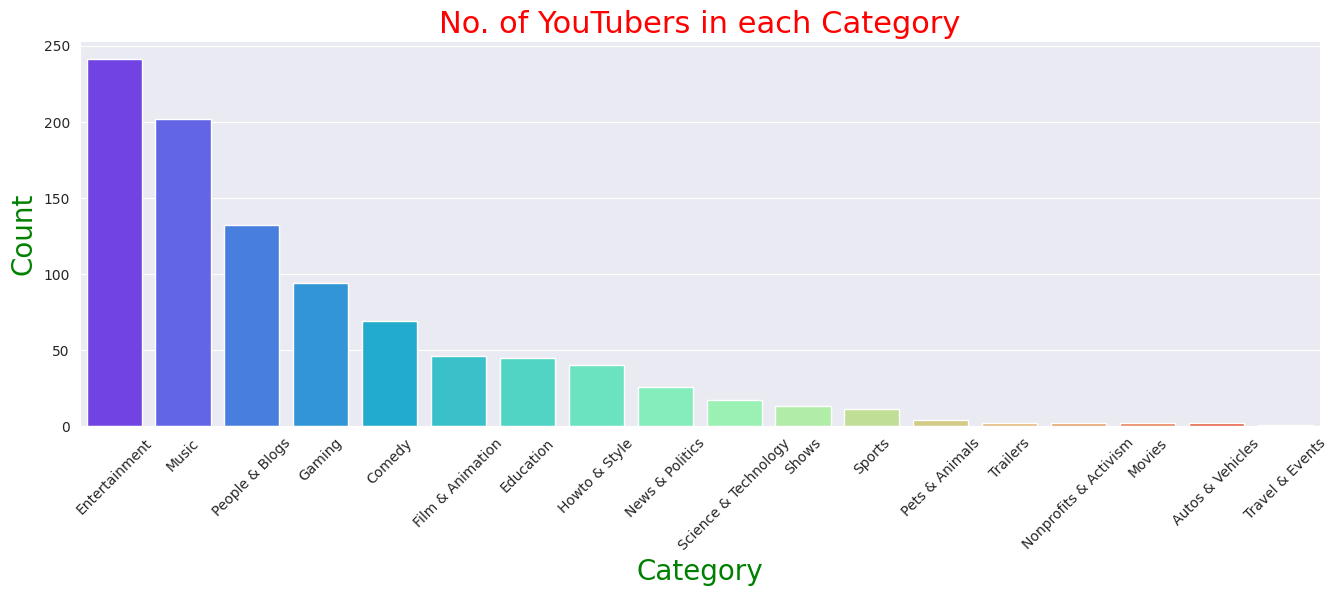

In [31]:
# Create a bar plot using Seaborn
plt.figure(figsize=(16, 5))
sns.barplot(x=youtubers_distribution_by_category.index, y=youtubers_distribution_by_category.values, palette='rainbow')
plt.ylabel('Count', color='green', size=20)
plt.xlabel('Category', color='green', size=20)
plt.title('No. of YouTubers in each Category', color='red', size=22)
plt.xticks(rotation=45)  # Rotate the channel types for better readability

plt.show()

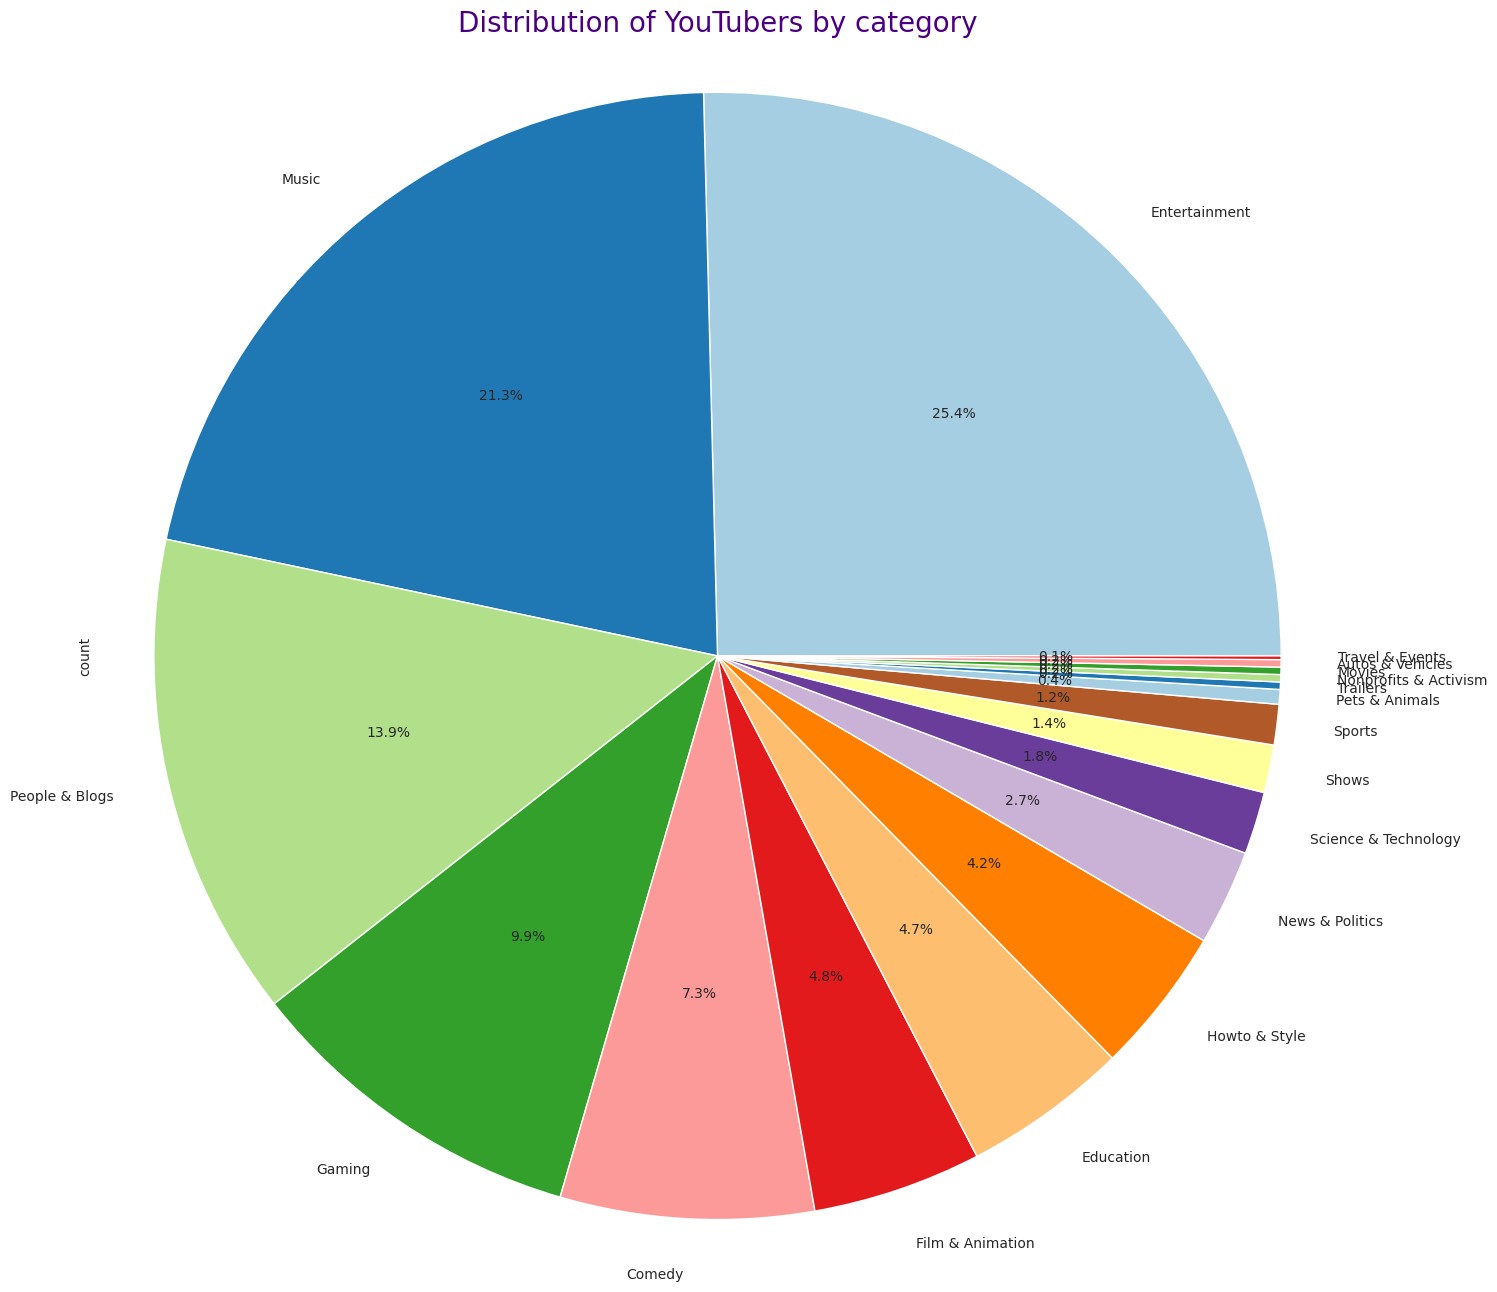

In [32]:
youtubers_distribution_by_category = df['category'].value_counts()
plt.figure(figsize=(16,16))
youtubers_distribution_by_category.plot(kind='pie', autopct='%1.1f%%', startangle=360, colors=plt.cm.Paired.colors)

# Create a pie chart
plt.title('Distribution of YouTubers by category',color='indigo',size=20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

In [33]:
df1 = df[[ 'Youtuber', 'rank', 'subscribers', 'video views', 'category', 'uploads', 'country', 'channel_type']]

In [34]:
df1.head()

,Youtuber,rank,subscribers,video views,category,uploads,country,channel_type
0,T-Series,1,245000000,2.280000e+11,Music,20082,India,Music
1,YouTube Movies,2,170000000,0.000000e+00,Film & Animation,1,United States,Games
2,MrBeast,3,166000000,2.836884e+10,Entertainment,741,United States,Entertainment
3,Cocomelon - Nursery Rhymes,4,162000000,1.640000e+11,Education,966,United States,Education
4,SET India,5,159000000,1.480000e+11,Shows,116536,India,Entertainment


In [35]:
from sklearn.preprocessing import LabelEncoder

# Create label encoders for 'country', 'category' and 'channel_type'
label_encoder_country = LabelEncoder()
label_encoder_category = LabelEncoder()
label_encoder_channel_type = LabelEncoder()


# Apply label encoding to the categorical columns
df1['country_encoded'] = label_encoder_country.fit_transform(df1['country'])
df1['category_encoded'] = label_encoder_category.fit_transform(df1['category'])
df1['channel_type_encoded'] = label_encoder_channel_type.fit_transform(df1['channel_type'])


In [36]:
# Drop the original 'country', 'category' and 'channel_type' column
df1.drop(columns=['country'], inplace=True)
df1.drop(columns=['category'], inplace=True)
df1.drop(columns=['channel_type'], inplace=True)

In [37]:
df1.head(20)

,Youtuber,rank,subscribers,video views,uploads,country_encoded,category_encoded,channel_type_encoded
0,T-Series,1,245000000,2.280000e+11,20082,18,8,8
1,YouTube Movies,2,170000000,0.000000e+00,1,46,4,6
2,MrBeast,3,166000000,2.836884e+10,741,46,3,4
3,Cocomelon - Nursery Rhymes,4,162000000,1.640000e+11,966,46,2,3
4,SET India,5,159000000,1.480000e+11,116536,18,14,4
5,Music,6,119000000,0.000000e+00,0,49,18,8
6,ýýý Kids Diana Show,7,112000000,9.324704e+10,1111,46,11,4
7,PewDiePie,8,111000000,2.905804e+10,4716,22,5,4
8,Like Nastya,9,106000000,9.047906e+10,493,33,11,11
9,Vlad and Niki,10,98900000,7.718017e+10,574,46,3,4


In [38]:
df1.isnull().sum()

Youtuber                0
rank                    0
subscribers             0
video views             0
uploads                 0
country_encoded         0
category_encoded        0
channel_type_encoded    0
dtype: int64

In [39]:
from sklearn.metrics.pairwise import cosine_similarity
# Create a user-item matrix (excluding the 'Youtuber' column)
user_item_matrix = df1.drop('Youtuber', axis=1).values

# Calculate cosine similarity between Youtubers
similarity_matrix = cosine_similarity(user_item_matrix)

In [40]:
sorted(list(enumerate(similarity_matrix[0])), reverse=True, key=lambda x:x[1])[1:8]

[(4, 0.9999999999997274),
 (82, 0.9999999999864561),
 (964, 0.9999999999851437),
 (56, 0.9999999999514522),
 (305, 0.9999999999506108),
 (963, 0.9999999999332508),
 (658, 0.9999999999291738)]

In [41]:
sorted(list(enumerate(similarity_matrix[4])), reverse=True, key=lambda x:x[1])[1:8]

[(0, 0.9999999999997274),
 (964, 0.9999999999867948),
 (82, 0.9999999999863798),
 (56, 0.9999999999505624),
 (305, 0.9999999999500632),
 (658, 0.9999999999376883),
 (963, 0.9999999999373592)]

In [42]:
df1[df1['Youtuber'] == 'SET India'].index[0]

4

In [43]:
df1[df1['Youtuber'] == 'WorkpointOfficial'].index[0]

82

In [44]:
df1[df1['Youtuber'] == 'Sun TV'].index[0]

305

In [45]:
def recommend_youtube(youtube_name):
    yt_index = df1[df1['Youtuber'] == youtube_name].index[0]
    distances = similarity_matrix[yt_index]
    yt_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x:x[1])[1:9]
    for i in yt_list:
        print(df1.iloc[i[0]].Youtuber)

In [46]:
recommend_youtube('T-Series')

SET India
WorkpointOfficial
Flowers Comedy
HAR PAL GEO
Sun TV
Zee Tamil
CNN
Younes Zarou


In [47]:
recommend_youtube('SET India')

T-Series
Flowers Comedy
WorkpointOfficial
HAR PAL GEO
Sun TV
CNN
Zee Tamil
Younes Zarou


In [48]:
recommend_youtube('Taylor Swift')

Post Malone
Danny Fitt
Migos ATL
LUCCAS NETO - LUCCAS TOON
Tips Official
Pencilmation
Ed Sheeran
TRANS7 OFFICIAL


In [49]:
recommend_youtube('MrBeast')

James Charles
Trakin Tech
ýýýýýýýýý Liziqi
ATHLEAN-Xï¿½
Make Joke Of
Werever2morro
LEGENDA FUNK
FC Barcelona


In [50]:
recommend_youtube('Justin Bieber')

Shawn Mendes
Ultra Bollywood
LazarBeam
Camilo
Daily Dose Of Internet
Yudist Ardhana
Like Nastya IDN
BBC News Hindi


In [51]:
recommend_youtube('Triggered Insaan')

FC Barcelona
Vocï¿½ï¿½ï¿½
MrBeast Gaming
Emiway Bantai
Make Joke Of
ATHLEAN-Xï¿½
INCRï¿½ï¿
MrBeast


In [52]:
recommend_youtube('Alan Walker')

melanie martinez
Renato Garcia YT
The Royalty Family
Reaction Time
The MriDul
Lele Pons
Sidhu Moose Wala
ExtraPolinesios


In [53]:
import pickle

In [54]:
df1['Youtuber'].head().values

array(['T-Series', 'YouTube Movies', 'MrBeast',
       'Cocomelon - Nursery Rhymes', 'SET India'], dtype=object)

In [55]:
pickle.dump(df1,open('yt.pkl','wb'))

In [56]:
pickle.dump(df1.to_dict(),open('yt_dict.pkl','wb'))

In [57]:
pickle.dump(similarity_matrix,open('similarity_matrix.pkl','wb'))